# Strategic Real Estate Investment Insights: Maximizing Returns and Mitigating Risk


## Project Overview

This project provides a comprehensive analysis of real estate investment opportunities. I have conducted a detailed analysis of real estate investment opportunities, focusing on key financial and underwriting metrics. These include:

- **Profitability Analysis**: Return on Investment (ROI), Rental Yield, Cap Rate, Cash Flow, Break-even Point.
- **Underwriting Metrics**: Debt Service Coverage Ratio (DSCR), Loan-to-Value (LTV) Ratio, Interest Coverage Ratio (ICR), Cash-on-Cash Return and Sensitivity Analysis.
- **Market Risk Assessment**: Analyzed the possession timelines, market liquidity and unapproved projects to assess risks.
- **Investment Strategies**: Suggestions based on the underwriting metrics and regional performance.


## Step 1: Loading and Cleaning the Data

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset
file_path = 'properties.csv'
data = pd.read_csv(file_path, low_memory=False)

# Cleaning the dataset by removing invalid or missing values
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
cleaned_data = data.dropna(subset=['Price', 'Units Available'])

# Making a deep copy of the cleaned_data to avoid SettingWithCopyWarning
cleaned_data = cleaned_data.copy()

# Converting prices to lakhs and crores using .loc[] to avoid SettingWithCopyWarning
cleaned_data['Price (in Lakhs)'] = cleaned_data['Price'] / 1e05
cleaned_data['Price (in Crores)'] = cleaned_data['Price'] / 1e07

# Filtering the data where prices are positive and units available are greater than zero
cleaned_data = cleaned_data[(cleaned_data['Price (in Crores)'] > 0) & (cleaned_data['Units Available'] > 0)]

# Recalculating Price Per Unit (in crores or lakhs as per your preference)
cleaned_data['Price Per Unit (in Crores)'] = cleaned_data['Price (in Crores)'] / cleaned_data['Units Available']

# Converting 'Availability Starts From' to datetime
cleaned_data['Availability Starts From'] = pd.to_datetime(cleaned_data['Availability Starts From'], errors='coerce')

# Displaying the first few rows
cleaned_data.head()

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type,Price (in Lakhs),Price (in Crores),Price Per Unit (in Crores)
0,12685,Under Construction,NaT,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,NaN,NaN,NaN,NaN,NaN,31.5,0.315,0.315000
1,12684,Ready to Move,NaT,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,NaN,NaN,NaN,NaN,NaN,63.0,0.630,0.063000
3,12682,Under Construction,NaT,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,NaN,NaN,NaN,NaN,NaN,90.0,0.900,0.012857
5,12680,Under Construction,NaT,16,N,Tycoons Group,ABAAut,2.0,6570000.0,65.7 Lac,...,1,1,NaN,NaN,NaN,NaN,NaN,65.7,0.657,0.328500
6,12679,Ready to Move,NaT,1,N,NaN,KDMC,4.0,5500000.0,55 Lac,...,1,1,NaN,NaN,NaN,NaN,NaN,55.0,0.550,0.137500


## Step 2: Initial Analysis on Under-Construction Projects

### Which Under-Construction Projects Are Likely to Yield the Highest Return?

In [14]:
# Filtering for under-construction projects only
under_construction_data = cleaned_data[cleaned_data['Possession Status'] == 'Under Construction'].copy()

# Converting prices to lakhs and crores if not already converted
under_construction_data['Price (in Lakhs)'] = under_construction_data['Price'] / 1e05
under_construction_data['Price (in Crores)'] = under_construction_data['Price'] / 1e07

# Calculating price per unit in crores (Price / Units Available) where units are available
under_construction_data['Price Per Unit (in Crores)'] = under_construction_data['Price (in Crores)'] / under_construction_data['Units Available']

# Droping rows with NaN or invalid Price Per Unit
under_construction_data = under_construction_data.dropna(subset=['Price Per Unit (in Crores)'])

# Sorting by Price Per Unit to find top projects with potential high returns
top_return_projects = under_construction_data.sort_values(by='Price Per Unit (in Crores)', ascending=False).head(10)

# Displaying the top projects
top_return_projects[['ID', 'Price Per Unit (in Crores)', 'Location']].head(10)


,ID,Price Per Unit (in Crores),Location
2411,10274,18.000000,"Dadar West, Mumbai"
7112,5573,14.000000,"Prabhadevi, Mumbai"
7265,5420,13.300000,"Prabhadevi, Mumbai"
7145,5540,13.000000,"Prabhadevi, Mumbai"
7199,5486,12.000000,"Prabhadevi, Mumbai"
2487,10198,9.050000,"Chandrakant Dhuru Wadi, Mumbai"
7216,5469,8.651250,"Prabhadevi, Mumbai"
10146,2539,8.500000,"Khar West, Mumbai"
7167,5518,8.133333,"Prabhadevi, Mumbai"
7143,5542,8.000000,"Prabhadevi, Mumbai"


### What is the Market Liquidity and is there a Relationship Between the Number of Units Available and Pricing?

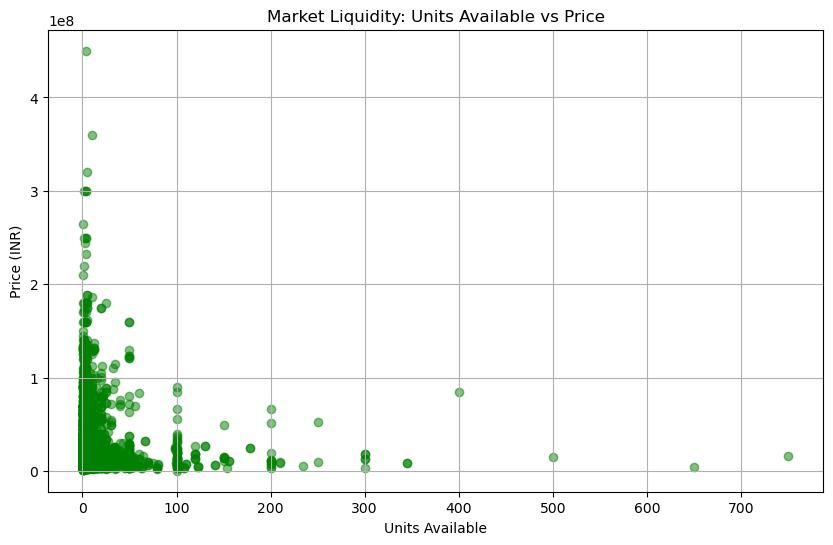

In [15]:

# Scatter plot to visualize the relationship between units available and price
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['Units Available'], cleaned_data['Price'], alpha=0.5, color='green')
plt.xlabel('Units Available')
plt.ylabel('Price (INR)')
plt.title('Market Liquidity: Units Available vs Price')
plt.grid(True)
plt.show()


### Which Developers Have Unapproved Projects, and How Does This Affect Investment Risk?

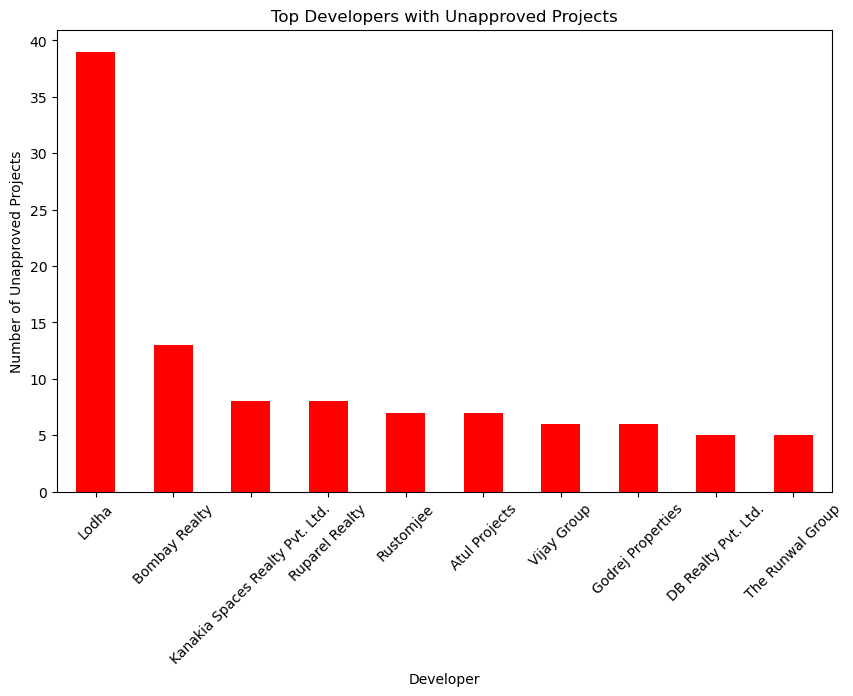

In [16]:

# Analyzing developers with unapproved projects
unapproved_projects = cleaned_data[cleaned_data['Approved Authority Name'].isna()]
# Counting the number of unapproved projects per developer
unapproved_by_developer = unapproved_projects['Developer'].value_counts().head(10)

# Bar plot to show unapproved projects by developer
plt.figure(figsize=(10, 6))
unapproved_by_developer.plot(kind='bar', color='red')
plt.xlabel('Developer')
plt.ylabel('Number of Unapproved Projects')
plt.title('Top Developers with Unapproved Projects')
plt.xticks(rotation=45)
plt.show()


### What Areas Have the Highest Number of Under-Construction Projects?

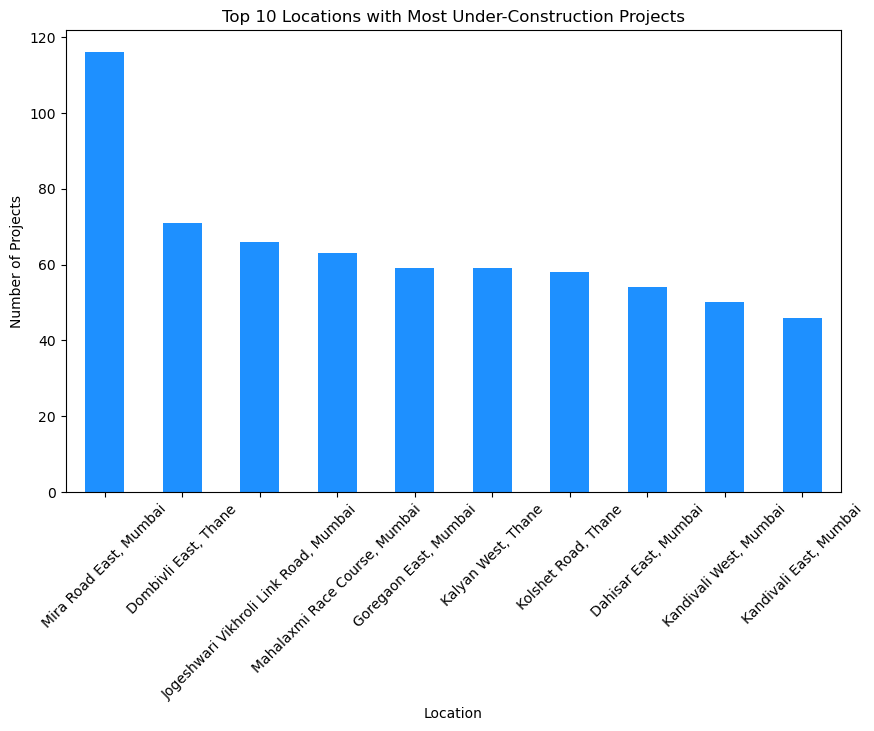

In [17]:

# Group by 'Location' and count the number of under-construction projects
projects_by_location = under_construction_data.groupby('Location').size().nlargest(10)

# Bar plot to show geographic investment hotspots
plt.figure(figsize=(10, 6))
projects_by_location.plot(kind='bar', color='dodgerblue')
plt.xlabel('Location')
plt.ylabel('Number of Projects')
plt.title('Top 10 Locations with Most Under-Construction Projects')
plt.xticks(rotation=45)
plt.show()


## Step 3: Profitability and Underwriting Analysis

### Step 1: Calculating Key Financial Metrics

In [18]:

# Assuming rental income and operating costs for financial analysis
# - Annual rental income = 5% of the property price
# - Operating expenses = 2% of the property price

cleaned_data['Annual Rental Income'] = cleaned_data['Price'] * 0.05
cleaned_data['Operating Expenses'] = cleaned_data['Price'] * 0.02

# Calculating ROI, Rental Yield, Cap Rate, and Cash Flow
cleaned_data['Projected Sale Price'] = cleaned_data['Price'] * 1.10  # Assuming 10% appreciation
cleaned_data['Profit'] = cleaned_data['Projected Sale Price'] - cleaned_data['Price']
cleaned_data['ROI (%)'] = (cleaned_data['Profit'] / cleaned_data['Price']) * 100
cleaned_data['Rental Yield (%)'] = (cleaned_data['Annual Rental Income'] / cleaned_data['Price']) * 100
cleaned_data['Net Operating Income'] = cleaned_data['Annual Rental Income'] - cleaned_data['Operating Expenses']
cleaned_data['Cap Rate (%)'] = (cleaned_data['Net Operating Income'] / cleaned_data['Price']) * 100
cleaned_data['Cash Flow'] = cleaned_data['Net Operating Income']
cleaned_data['Break-even Point (Years)'] = cleaned_data['Price'] / cleaned_data['Net Operating Income']

# Filtering out projects where Net Annual Rental Income is non-positive
cleaned_data = cleaned_data[cleaned_data['Net Operating Income'] > 0]


### Step 2: Debt Service Coverage Ratio (DSCR), LTV, ICR, and Sensitivity Analysis

In [19]:

# Practical loan assumptions
loan_amount = 5000000  # ₹5,000,000 (₹50 lakh)
interest_rate = 0.06  # 6% annual interest
loan_term_years = 10  # Loan term of 10 years

# Step 1: Calculating Annual Debt Service (ADS) using a loan amortization formula
annual_debt_service = loan_amount * (interest_rate / (1 - (1 + interest_rate)**(-loan_term_years)))

# Step 2: Debt Service Coverage Ratio (DSCR)
cleaned_data['DSCR'] = cleaned_data['Net Operating Income'] / annual_debt_service

# Step 3: Loan-to-Value (LTV) Ratio
cleaned_data['LTV (%)'] = (loan_amount / cleaned_data['Price']) * 100

# Step 4: Interest Coverage Ratio (ICR)
annual_interest_payments = loan_amount * interest_rate
cleaned_data['ICR'] = cleaned_data['Net Operating Income'] / annual_interest_payments

# Step 5: Sensitivity Analysis (-5% Rental Income)
cleaned_data['NOI (-5% Rental Income)'] = (cleaned_data['Annual Rental Income'] * 0.95) - cleaned_data['Operating Expenses']
cleaned_data['DSCR (-5% Rental Income)'] = cleaned_data['NOI (-5% Rental Income)'] / annual_debt_service

# Step 6: Cash-on-Cash Return
cleaned_data['Cash-on-Cash Return (%)'] = (cleaned_data['Cash Flow'] / loan_amount) * 100

# Step 7: Break-even Occupancy Rate
gross_potential_income = cleaned_data['Annual Rental Income']  # Assuming 100% occupancy
cleaned_data['Break-even Occupancy Rate (%)'] = ((cleaned_data['Operating Expenses'] + annual_debt_service) / gross_potential_income) * 100


### Binned Bar Charts and Correlation Heatmap for DSCR, LTV, ICR

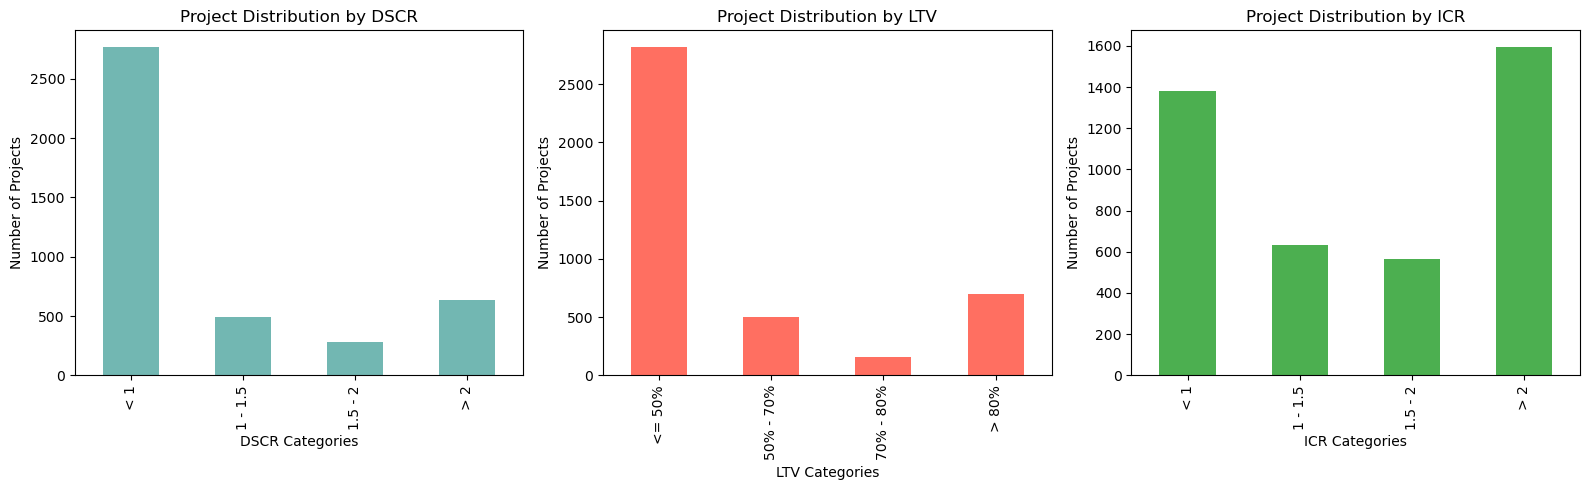

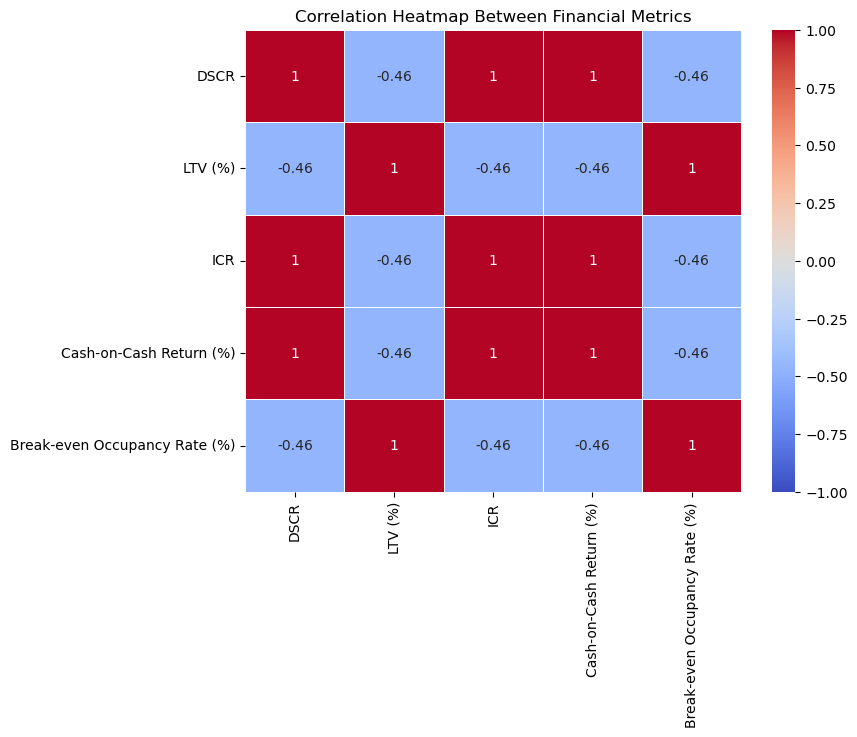

In [20]:

# Defining bins for DSCR, LTV, ICR analysis
dscr_bins = [0, 1, 1.5, 2, np.inf]
dscr_labels = ['< 1', '1 - 1.5', '1.5 - 2', '> 2']
cleaned_data['DSCR Category'] = pd.cut(cleaned_data['DSCR'], bins=dscr_bins, labels=dscr_labels)

ltv_bins = [0, 50, 70, 80, np.inf]
ltv_labels = ['<= 50%', '50% - 70%', '70% - 80%', '> 80%']
cleaned_data['LTV Category'] = pd.cut(cleaned_data['LTV (%)'], bins=ltv_bins, labels=ltv_labels)

icr_bins = [0, 1, 1.5, 2, np.inf]
icr_labels = ['< 1', '1 - 1.5', '1.5 - 2', '> 2']
cleaned_data['ICR Category'] = pd.cut(cleaned_data['ICR'], bins=icr_bins, labels=icr_labels)

# Counting the number of projects in each DSCR, LTV, and ICR category
dscr_counts = cleaned_data['DSCR Category'].value_counts(sort=False)
ltv_counts = cleaned_data['LTV Category'].value_counts(sort=False)
icr_counts = cleaned_data['ICR Category'].value_counts(sort=False)

# Plot the binned bar charts
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
dscr_counts.plot(kind='bar', color='#72B7B2')
plt.xlabel('DSCR Categories')
plt.ylabel('Number of Projects')
plt.title('Project Distribution by DSCR')

plt.subplot(1, 3, 2)
ltv_counts.plot(kind='bar', color='#FF6F61')
plt.xlabel('LTV Categories')
plt.ylabel('Number of Projects')
plt.title('Project Distribution by LTV')

plt.subplot(1, 3, 3)
icr_counts.plot(kind='bar', color='#4CAF50')
plt.xlabel('ICR Categories')
plt.ylabel('Number of Projects')
plt.title('Project Distribution by ICR')

plt.tight_layout()
plt.show()

# Correlation Heatmap for Financial Metrics
correlation_data = cleaned_data[['DSCR', 'LTV (%)', 'ICR', 'Cash-on-Cash Return (%)', 'Break-even Occupancy Rate (%)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap Between Financial Metrics')
plt.show()



## Step 4: Investment Strategies Based on Underwriting Analysis

Based on the underwriting analysis, the following investment strategies are recommended to optimize profitability and minimize risk:

### 1. **High DSCR and ICR Projects**
- **Strategy**: Safe, low-risk investment with strong debt coverage.
- **Key Insight**: Projects with DSCR > 1.5 and ICR > 1.5 are able to comfortably cover debt payments and interest. These projects are financially sound for investors who prefer steady returns with minimal risk.
- **Action**: Prioritize projects with DSCR > 1.5 for long-term stability, especially in growth areas like **Thane** and **Dombivli East**.

### 2. **Low LTV Projects (Below 70%)**
- **Strategy**: Lower risk financing with better loan terms.
- **Key Insight**: Projects with LTV < 70% represent a safer investment from a loan perspective. They allow for better loan terms and lower risk of default.
- **Action**: Invest in projects with lower LTV to ensure better financing terms, especially for investors seeking properties with long-term capital appreciation in areas like **Mira Road**.

### 3. **Projects with High Cash-on-Cash Return**
- **Strategy**: Focus on immediate income and cash flow.
- **Key Insight**: Projects with high cash-on-cash return (>8%) provide strong immediate income relative to the invested cash. Investors seeking quick returns should target these.
- **Action**: Prioritize projects with high cash-on-cash returns in rental demand areas like **Jogeshwari**.

### 4. **Break-even Occupancy Projects with Low Risk**
- **Strategy**: Prioritize projects that remain profitable at low occupancy levels.
- **Key Insight**: Projects with break-even occupancy rates below 80% are more resilient to vacancies and rental income fluctuations. These are ideal for conservative investors.
- **Action**: Invest in projects with low break-even occupancy rates for long-term resilience, especially in areas like **Dahisar** and **Virar**, which have strong rental demand and lower price points.

### 5. **Mixed Strategy for Balanced Portfolio**
- **Strategy**: A diversified portfolio with a mix of high DSCR projects and cash flow projects.
- **Key Insight**: A combination of safe, high DSCR projects along with high-yield cash flow properties can provide both stability and income.
- **Action**: For a balanced portfolio, combine high DSCR projects in areas like **Thane** with high cash-on-cash return projects in **Jogeshwari** to maximize both stability and returns.
